### Question 1: What is the relationship between various socio-economic factors and the share of female STEM graduates over time, and can these factors predict future trends in the proportion of women entering STEM fields?

In [1]:
#import packages

# general
import numpy as np
import pandas as pd
import time

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load in the dataset
df = pd.read_csv('transformed_data.csv')
df.head()

,Unnamed: 0,Year,A woman can be head of household in the same way as a man (1=yes; 0=no),A woman can choose where to live in the same way as a man (1=yes; 0=no),A woman can get a job in the same way as a man (1=yes; 0=no),A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no),A woman can open a bank account in the same way as a man (1=yes; 0=no),A woman can register a business in the same way as a man (1=yes; 0=no),A woman can sign a contract in the same way as a man (1=yes; 0=no),A woman can travel outside her home in the same way as a man (1=yes; 0=no),...,Country Name_Ukraine,Country Name_United Arab Emirates,Country Name_United Kingdom,Country Name_United States,Country Name_Uruguay,Country Name_Uzbekistan,"Country Name_Venezuela, RB",Country Name_Viet Nam,Country Name_West Bank and Gaza,Country Name_Zimbabwe
0,0,2000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2003,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#create X and y dataframes
X = df.drop(columns=['Year', 'Share of STEM Graduates'])  # Features except Year and Share of STEM Graduates
y = df['Share of STEM Graduates']  # Target variable (proportion of female STEM graduates)

In [4]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
y_test

396    25.41667
227    38.22861
673    42.02128
702    41.93297
643    31.55822
         ...   
35     31.68841
870     0.00000
503    29.12744
472    38.69916
211    37.62688
Name: Share of STEM Graduates, Length: 215, dtype: float64

In [14]:

# Defining features and target variable
X = df.drop(columns=['Year', 'Share of STEM Graduates'])  # Features except Year and Share of STEM Graduates
y = df['Share of STEM Graduates']  # Target variable (proportion of female STEM graduates)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions on the training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#evaluate the model using MSE and R squared
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)

#print the MSE and R_squared
print('MSE (Train): ', round(mse_train, 3))
print('MSE (Test): ', round(mse_test, 3))
print('R-Squared (Train): ', round(r_sq_train, 3))
print('R-Squared (Test): ', round(r_sq_test, 3))

# Getting the coefficients (indicating the importance of each feature)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)


MSE (Train):  21.301
MSE (Test):  45.411
R-Squared (Train):  0.799
R-Squared (Test):  0.52
Coefficients:
                                               Feature  Coefficient
0                                           Unnamed: 0    -0.012362
1    A woman can be head of household in the same w...     4.385483
2    A woman can choose where to live in the same w...     6.978327
3    A woman can get a job in the same way as a man...     1.631456
4    A woman can obtain a judgment of divorce in th...    -4.958285
..                                                 ...          ...
182                            Country Name_Uzbekistan     8.369470
183                         Country Name_Venezuela, RB    -2.457431
184                              Country Name_Viet Nam    13.240519
185                    Country Name_West Bank and Gaza    26.933607
186                              Country Name_Zimbabwe    18.164630

[187 rows x 2 columns]


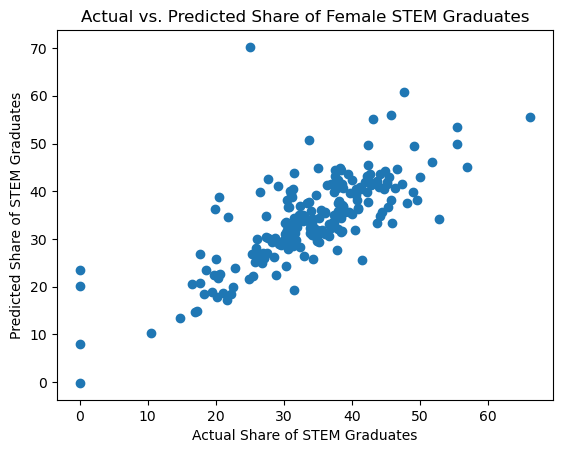

In [15]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Share of STEM Graduates")
plt.ylabel("Predicted Share of STEM Graduates")
plt.title("Actual vs. Predicted Share of Female STEM Graduates")
plt.show()


The initial model performs reasonably well with an r-squared of 0.799 for the training data and 0.522 for the test data. However, the lower test r-squared compared to the training r-squared suggests a potential issue with overfitting. Furthermore, the mean squared error (MSE) of the test data is significantly higher than that of the training data. While this basic linear regression model shows satisfactory performance, exploring more sophisticated models will provide insights into potential improvements.

### References

1. Lab 3 Solutions